In [1]:
# import the needed packages and check version
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pickle

print("tensorflow: ", tf.__version__) #1.14.0

tensorflow:  1.14.0


In [2]:
#import the fashion mnist dataset (from Zalando)
boston_housing = keras.datasets.boston_housing
data = boston_housing.load_data()
(train_x, train_y), (test_x, test_y) = data
#(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Data Analysis

Dataset taken from the StatLib library which is maintained at Carnegie Mellon University.

Samples contain 13 attributes of houses at different locations around the Boston suburbs in the late 1970s. Targets are the median values of the houses at a location (in k$).

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
 prices and the demand for clean air', J. Environ. Economics & Management,
 vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
 ...', Wiley, 1980.   N.B. Various transformations are used in the table on
 pages 244-261 of the latter.

 Variables in order:
 - CRIM     per capita crime rate by town
 - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 - INDUS    proportion of non-retail business acres per town
 - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 - NOX      nitric oxides concentration (parts per 10 million)
 - RM       average number of rooms per dwelling
 - AGE      proportion of owner-occupied units built prior 
to 1940
 - DIS      weighted distances to five Boston employment centres
 - RAD      index of accessibility to radial highways
 - TAX      full-value property-tax rate per USD 10000
 - PTRATIO  pupil-teacher ratio by town
 - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 - LSTAT    % lower status of the population
 - MEDV     Median value of owner-occupied homes in $1000's

In [3]:
df = pd.DataFrame(train_x)
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.745111,11.480198,11.104431,0.061881,0.557356,6.267082,69.010644,3.740271,9.440594,405.898515,18.475990,354.783168,12.740817
std,9.240734,23.767711,6.811308,0.241238,0.117293,0.709788,27.940665,2.030215,8.698360,166.374543,2.200382,94.111148,7.254545
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.453000,5.874750,45.475000,2.077100,4.000000,279.000000,17.225000,374.672500,6.890000
50%,0.268880,0.000000,9.690000,0.000000,0.538000,6.198500,78.500000,3.142300,5.000000,330.000000,19.100000,391.250000,11.395000
75%,3.674808,12.500000,18.100000,0.000000,0.631000,6.609000,94.100000,5.118000,24.000000,666.000000,20.200000,396.157500,17.092500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


In [6]:
#data_train = pd.DataFrame(train_x)
#sns.pairplot(data_train)

In [7]:
print(train_x.shape)
print(test_x.shape)

(404, 13)
(102, 13)


# Preprocess the data

In [5]:
# check possible clusters for exclusion
from sklearn.cluster import KMeans

In [6]:
kmeans = KMeans(n_clusters = 6, random_state=0).fit(train_x)

In [10]:
cluster_train = kmeans.labels_

In [8]:
# check the distribution of the clusters
unique, counts = np.unique(cluster_train, return_counts=True)
print(unique, counts)

[0 1 2 3 4 5] [ 63  77  29  73 154   8]


In [11]:
# apply the same clustering to the test data
cluster_test = kmeans.predict(test_x)

In [10]:
# check the distribution of the clusters
unique, counts = np.unique(cluster_test, return_counts=True)
print(unique, counts)

[0 1 2 3 4 5] [17 26  5 14 37  3]


In [3]:
# save the clustering to be able to reproduce later
filename = 'A_101_kmeans.sav'

In [12]:
pickle.dump(kmeans, open(filename, 'wb'))

In [4]:
# load the kmeans
kmeans = pickle.load(open(filename, 'rb'))

In [14]:
kmeans.predict(test_x)

array([2, 3, 0, 3, 0, 3, 3, 4, 0, 1, 5, 4, 3, 0, 1, 4, 4, 3, 1, 1, 1, 2,
       4, 4, 4, 1, 4, 0, 2, 4, 3, 2, 0, 4, 1, 1, 3, 5, 1, 4, 0, 4, 1, 4,
       0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 3, 0, 1, 4, 0, 0, 1, 1, 2, 3, 4, 4,
       1, 4, 1, 1, 1, 4, 1, 1, 4, 4, 4, 4, 0, 1, 4, 4, 4, 1, 4, 4, 1, 4,
       4, 1, 0, 3, 4, 4, 0, 3, 4, 1, 3, 3, 4, 5])

# baseline neural network

In [15]:
model_nn = keras.Sequential([
    keras.layers.Dense(13, input_dim=13, kernel_initializer='normal', activation='sigmoid'),
    keras.layers.Dense(26),
    keras.layers.Dense(13),
    keras.layers.Dense(9),
    keras.layers.Dense(6),
    keras.layers.Dense(3),
    #keras.layers.Dropout(0.5),
    keras.layers.Dense(1, kernel_initializer='normal')
])

model_nn.compile(loss='mean_squared_error', optimizer='adam')

W1215 07:04:50.341538  6744 deprecation.py:506] From c:\users\annar\project_folder\venv\lib\site-packages\tensorflow\python\keras\initializers.py:143: calling RandomNormal.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1215 07:04:50.347666  6744 deprecation.py:506] From c:\users\annar\project_folder\venv\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [16]:
history = model_nn.fit(train_x, train_y, epochs = 500)

Epoch 1/500
404/404 [==============================] - 1s 2ms/sample - loss: 582.7146
Epoch 2/500
404/404 [==============================] - 0s 64us/sample - loss: 570.1871
Epoch 3/500
404/404 [==============================] - 0s 144us/sample - loss: 541.3061
Epoch 4/500
404/404 [==============================] - 0s 120us/sample - loss: 482.1834
Epoch 5/500
404/404 [==============================] - 0s 81us/sample - loss: 369.9583
Epoch 6/500
404/404 [==============================] - 0s 69us/sample - loss: 205.3157
Epoch 7/500
404/404 [==============================] - 0s 70us/sample - loss: 90.8257
Epoch 8/500
404/404 [==============================] - 0s 104us/sample - loss: 90.7629
Epoch 9/500
404/404 [==============================] - 0s 91us/sample - loss: 82.8039
Epoch 10/500
404/404 [==============================] - 0s 121us/sample - loss: 79.9317
Epoch 11/500
404/404 [==============================] - 0s 132us/sample - loss: 77.4308
Epoch 12/500
404/404 [====================

404/404 [==============================] - 0s 71us/sample - loss: 14.4208
Epoch 96/500
404/404 [==============================] - 0s 94us/sample - loss: 14.1837
Epoch 97/500
404/404 [==============================] - 0s 72us/sample - loss: 14.3738
Epoch 98/500
404/404 [==============================] - 0s 72us/sample - loss: 14.2986
Epoch 99/500
404/404 [==============================] - 0s 101us/sample - loss: 14.4532
Epoch 100/500
404/404 [==============================] - 0s 91us/sample - loss: 14.2054
Epoch 101/500
404/404 [==============================] - 0s 83us/sample - loss: 20.2949
Epoch 102/500
404/404 [==============================] - 0s 70us/sample - loss: 14.4302
Epoch 103/500
404/404 [==============================] - 0s 70us/sample - loss: 16.1525
Epoch 104/500
404/404 [==============================] - 0s 68us/sample - loss: 14.7537
Epoch 105/500
404/404 [==============================] - 0s 59us/sample - loss: 16.5019
Epoch 106/500
404/404 [==========================

404/404 [==============================] - 0s 85us/sample - loss: 13.8835
Epoch 281/500
404/404 [==============================] - 0s 63us/sample - loss: 13.4015
Epoch 282/500
404/404 [==============================] - 0s 53us/sample - loss: 11.8891
Epoch 283/500
404/404 [==============================] - 0s 92us/sample - loss: 11.8849
Epoch 284/500
404/404 [==============================] - 0s 79us/sample - loss: 12.5432
Epoch 285/500
404/404 [==============================] - 0s 64us/sample - loss: 12.7432
Epoch 286/500
404/404 [==============================] - 0s 56us/sample - loss: 11.9203
Epoch 287/500
404/404 [==============================] - 0s 72us/sample - loss: 12.7864
Epoch 288/500
404/404 [==============================] - 0s 91us/sample - loss: 12.8048
Epoch 289/500
404/404 [==============================] - 0s 69us/sample - loss: 11.7807
Epoch 290/500
404/404 [==============================] - 0s 69us/sample - loss: 12.3703
Epoch 291/500
404/404 [=======================

Epoch 465/500
404/404 [==============================] - 0s 54us/sample - loss: 11.3570
Epoch 466/500
404/404 [==============================] - 0s 66us/sample - loss: 11.5019
Epoch 467/500
404/404 [==============================] - 0s 53us/sample - loss: 12.1801
Epoch 468/500
404/404 [==============================] - 0s 73us/sample - loss: 11.6492
Epoch 469/500
404/404 [==============================] - 0s 110us/sample - loss: 11.8532
Epoch 470/500
404/404 [==============================] - 0s 120us/sample - loss: 11.7473
Epoch 471/500
404/404 [==============================] - 0s 89us/sample - loss: 12.0769
Epoch 472/500
404/404 [==============================] - 0s 95us/sample - loss: 12.0466
Epoch 473/500
404/404 [==============================] - 0s 87us/sample - loss: 11.9597
Epoch 474/500
404/404 [==============================] - 0s 100us/sample - loss: 12.3409
Epoch 475/500
404/404 [==============================] - 0s 57us/sample - loss: 11.5500
Epoch 476/500
404/404 [======

In [17]:
# save the model
model_nn.save('A_101_baseline_nn.h5')

In [5]:
# load the model
model_nn = tf.keras.models.load_model('A_101_baseline_nn.h5')

W1221 10:03:35.319350  2904 deprecation.py:506] From c:\users\annar\project_folder\venv\lib\site-packages\tensorflow\python\keras\initializers.py:143: calling RandomNormal.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1221 10:03:35.319350  2904 deprecation.py:506] From c:\users\annar\project_folder\venv\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1221 10:03:35.349911  2904 deprecation.py:506] From c:\users\annar\project_folder\venv\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_

In [6]:
# Check the training data

In [9]:
pred_test = model_nn.predict(train_x)

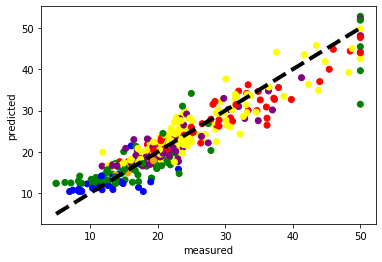

In [10]:
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'orange']
fig, ax = plt.subplots()
ax.scatter(train_y, pred_test, c = cluster_train, cmap=matplotlib.colors.ListedColormap(colors))
ax.plot([train_y.min(), train_y.max()], [train_y.min(), train_y.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()

In [11]:
# check the predictions by the nn on the test data

In [12]:
pred = model_nn.predict(test_x)

In [13]:
diff = pred - test_y

In [14]:
((diff**2).sum())/train_x.shape[0] #989

3903.4358867437622

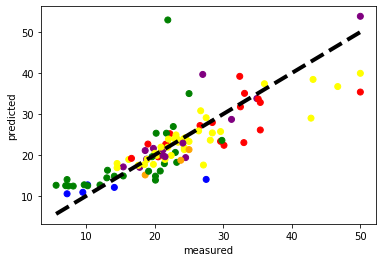

In [15]:
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'orange']
fig, ax = plt.subplots()
ax.scatter(test_y, pred, c = cluster_test, cmap=matplotlib.colors.ListedColormap(colors))
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()

## Minimize one of the KMeans Clusters

In [7]:
# define function to select only specific category
def select_max_category(data, label, category, max_nr_for_category):
    new_data = []
    new_label = []
    for i in range(len(label)):
        if label[i] == category:
            if len(new_label) <= max_nr_for_category-1:
                new_label.append(label[i])
                new_data.append(data[i])
    #new_data = np.array(new_data)
    #new_label = np.array(new_label)
    return new_data, new_label

In [12]:
# create a small set for the cluster 1
one_x = train_x[np.where(cluster_train==1)[0]]
one_y = train_y[np.where(cluster_train==1)[0]]

In [13]:
train_x_mod = np.delete(train_x, np.where((cluster_train == 1))[0], axis = 0)

In [14]:
train_y_mod = np.delete(train_y, np.where((cluster_train == 1))[0], axis = 0)

In [15]:
cluster_train_mod = np.delete(cluster_train, np.where((cluster_train == 1))[0], axis = 0)

In [16]:
one_x.shape
# 77 observations
# we will only use 7 observations

(77, 13)

In [17]:
train_x_mod = np.concatenate([one_x[0:7], train_x_mod], axis = 0)

In [18]:
train_y_mod = np.concatenate([one_y[0:7], train_y_mod], axis = 0)

In [46]:
cluster_train_mod = np.concatenate([[1,1,1,1,1,1,1], cluster_train_mod], axis = 0)

In [47]:
print(train_x_mod.shape)
print(train_y_mod.shape)
print(cluster_train_mod.shape)

(334, 13)
(334,)
(334,)


In [48]:
model_mc = keras.Sequential([
    keras.layers.Dense(13, input_dim=13, kernel_initializer='normal', activation='sigmoid'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(26),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(13),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(9),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(6),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(3),
    keras.layers.Dropout(0.2),
    #keras.layers.Dropout(0.5),
    keras.layers.Dense(1, kernel_initializer='normal')
])

model_mc.compile(loss='mean_squared_error', optimizer='adam')

In [49]:
history = model_mc.fit(train_x_mod, train_y_mod, epochs = 500)

Epoch 1/500
334/334 [==============================] - 1s 3ms/sample - loss: 626.3609
Epoch 2/500
334/334 [==============================] - 0s 130us/sample - loss: 613.8300
Epoch 3/500
334/334 [==============================] - 0s 154us/sample - loss: 588.4032
Epoch 4/500
334/334 [==============================] - 0s 152us/sample - loss: 549.3254
Epoch 5/500
334/334 [==============================] - 0s 81us/sample - loss: 467.3882
Epoch 6/500
334/334 [==============================] - 0s 106us/sample - loss: 330.5327
Epoch 7/500
334/334 [==============================] - 0s 189us/sample - loss: 259.9395
Epoch 8/500
334/334 [==============================] - 0s 136us/sample - loss: 246.5276
Epoch 9/500
334/334 [==============================] - 0s 103us/sample - loss: 212.3376
Epoch 10/500
334/334 [==============================] - 0s 113us/sample - loss: 236.2735
Epoch 11/500
334/334 [==============================] - 0s 87us/sample - loss: 210.8122
Epoch 12/500
334/334 [============

334/334 [==============================] - 0s 71us/sample - loss: 109.4047
Epoch 185/500
334/334 [==============================] - 0s 71us/sample - loss: 93.1831
Epoch 186/500
334/334 [==============================] - 0s 104us/sample - loss: 107.4248
Epoch 187/500
334/334 [==============================] - 0s 68us/sample - loss: 98.6978
Epoch 188/500
334/334 [==============================] - 0s 49us/sample - loss: 112.8284
Epoch 189/500
334/334 [==============================] - 0s 50us/sample - loss: 115.7426
Epoch 190/500
334/334 [==============================] - 0s 63us/sample - loss: 122.8486
Epoch 191/500
334/334 [==============================] - 0s 50us/sample - loss: 112.7525
Epoch 192/500
334/334 [==============================] - 0s 69us/sample - loss: 135.2968
Epoch 193/500
334/334 [==============================] - 0s 70us/sample - loss: 101.6534
Epoch 194/500
334/334 [==============================] - 0s 37us/sample - loss: 114.3533
Epoch 195/500
334/334 [=============

334/334 [==============================] - 0s 92us/sample - loss: 97.6222
Epoch 369/500
334/334 [==============================] - 0s 66us/sample - loss: 102.8660
Epoch 370/500
334/334 [==============================] - 0s 66us/sample - loss: 84.3591
Epoch 371/500
334/334 [==============================] - 0s 68us/sample - loss: 98.8779
Epoch 372/500
334/334 [==============================] - 0s 66us/sample - loss: 97.6554
Epoch 373/500
334/334 [==============================] - 0s 75us/sample - loss: 86.6550
Epoch 374/500
334/334 [==============================] - 0s 80us/sample - loss: 78.3466
Epoch 375/500
334/334 [==============================] - 0s 69us/sample - loss: 93.7893
Epoch 376/500
334/334 [==============================] - 0s 63us/sample - loss: 88.1833
Epoch 377/500
334/334 [==============================] - 0s 82us/sample - loss: 111.0929
Epoch 378/500
334/334 [==============================] - 0s 66us/sample - loss: 81.7458
Epoch 379/500
334/334 [=====================

334/334 [==============================] - 0s 45us/sample - loss: 86.6152
Epoch 462/500
334/334 [==============================] - 0s 98us/sample - loss: 71.4153
Epoch 463/500
334/334 [==============================] - 0s 108us/sample - loss: 78.6015
Epoch 464/500
334/334 [==============================] - 0s 118us/sample - loss: 63.4608
Epoch 465/500
334/334 [==============================] - 0s 98us/sample - loss: 71.3919
Epoch 466/500
334/334 [==============================] - 0s 85us/sample - loss: 79.0774
Epoch 467/500
334/334 [==============================] - 0s 83us/sample - loss: 77.0312
Epoch 468/500
334/334 [==============================] - 0s 94us/sample - loss: 82.4260
Epoch 469/500
334/334 [==============================] - 0s 78us/sample - loss: 77.9367
Epoch 470/500
334/334 [==============================] - 0s 83us/sample - loss: 71.8490
Epoch 471/500
334/334 [==============================] - 0s 63us/sample - loss: 74.1096
Epoch 472/500
334/334 [=====================

In [50]:
model_mc.save('B_101_mc.h5')

In [19]:
model_mc = tf.keras.models.load_model('B_101_mc.h5')

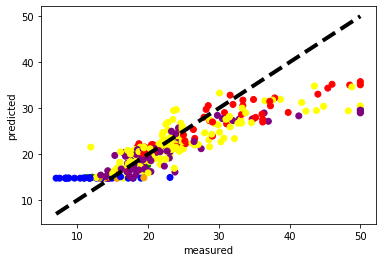

In [52]:
# with just the points seen during training
pred_test = model_mc.predict(train_x_mod)

colors = ['red', 'green', 'blue', 'purple', 'yellow', 'orange']
fig, ax = plt.subplots()
ax.scatter(train_y_mod, pred_test, c = cluster_train_mod, cmap=matplotlib.colors.ListedColormap(colors))
ax.plot([train_y_mod.min(), train_y_mod.max()], [train_y_mod.min(), train_y_mod.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()

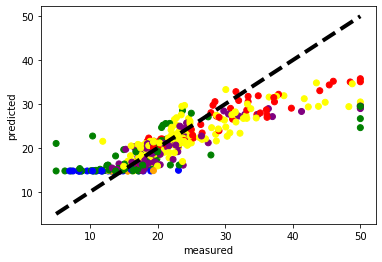

In [53]:
# with the unseen points during training
pred_test = model_mc.predict(train_x)

colors = ['red', 'green', 'blue', 'purple', 'yellow', 'orange']
fig, ax = plt.subplots()
ax.scatter(train_y, pred_test, c = cluster_train, cmap=matplotlib.colors.ListedColormap(colors))
ax.plot([train_y.min(), train_y.max()], [train_y.min(), train_y.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()

In [54]:
# check the test dataset
pred = model_mc.predict(test_x)

In [55]:
diff = pred - test_y

In [56]:
((diff**2).sum())/train_x.shape[0] #989

2904.095381373256

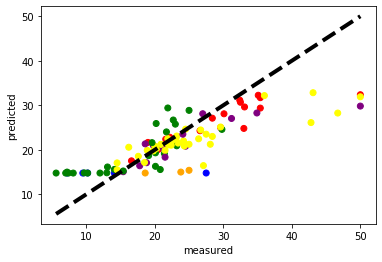

In [57]:
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'orange']
fig, ax = plt.subplots()
ax.scatter(test_y, pred, c = cluster_test, cmap=matplotlib.colors.ListedColormap(colors))
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()

# create a prediction method to price in uncertainty

In [20]:
import tensorflow.keras.backend as K
model_mc_pred = K.function([model_mc.input, K.learning_phase()], [model_mc.output])

In [21]:
# set n for number of iterations:
n = 100
x = np.array(model_mc_pred([test_x, 1]))
for i in range(1, n, 1):
    y = np.array(model_mc_pred([test_x, 1]))
    x = np.concatenate([x,y], axis = 0)
pred_mean = x.mean(axis = 0)
pred_var = x.var(axis = 0)

# The variance is the average of the squared deviations from the mean, i.e., var = mean(abs(x - x.mean())**2).

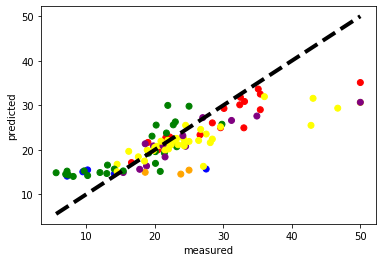

In [22]:
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'orange']
fig, ax = plt.subplots()
ax.scatter(test_y, pred_mean, c = cluster_test, cmap=matplotlib.colors.ListedColormap(colors))
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()

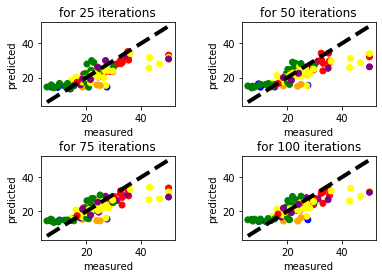

In [23]:
for i in range(25, 101, 25):
    n = i
    x = np.array(model_mc_pred([test_x, 1]))
    for j in range(1, n, 1):
        y = np.array(model_mc_pred([test_x, 1]))
        x = np.concatenate([x,y], axis = 0)
    pred_mean = x.mean(axis = 0)
    #plt.figure(figsize = [12,12])
    plt.subplot(2,2,i/25)
    plt.subplots_adjust(hspace = 0.6, wspace = 0.5)
    plt.scatter(test_y, pred_mean, c = cluster_test, cmap=matplotlib.colors.ListedColormap(colors))
    plt.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=4)
    plt.xlabel('measured')
    plt.ylabel('predicted')
    plt.title('for ' + str(i) + ' iterations')
plt.show()

# loop through all the classes and see how they affect the model

341 13
341 13
341 13
354
Epoch 1/500
354/354 [==============================] - 1s 4ms/sample - loss: 529.6869
Epoch 2/500
354/354 [==============================] - 0s 202us/sample - loss: 521.2654
Epoch 3/500
354/354 [==============================] - 0s 209us/sample - loss: 502.7390
Epoch 4/500
354/354 [==============================] - 0s 124us/sample - loss: 460.8696
Epoch 5/500
354/354 [==============================] - 0s 148us/sample - loss: 371.5583
Epoch 6/500
354/354 [==============================] - 0s 236us/sample - loss: 239.9596
Epoch 7/500
354/354 [==============================] - 0s 91us/sample - loss: 191.8223
Epoch 8/500
354/354 [==============================] - 0s 173us/sample - loss: 196.3492
Epoch 9/500
354/354 [==============================] - 0s 121us/sample - loss: 170.3098
Epoch 10/500
354/354 [==============================] - 0s 138us/sample - loss: 192.7041
Epoch 11/500
354/354 [==============================] - 0s 110us/sample - loss: 180.2565
Epoch 12

354/354 [==============================] - 0s 159us/sample - loss: 132.7813
Epoch 94/500
354/354 [==============================] - 0s 150us/sample - loss: 146.5051
Epoch 95/500
354/354 [==============================] - 0s 224us/sample - loss: 141.5837
Epoch 96/500
354/354 [==============================] - 0s 166us/sample - loss: 136.4155
Epoch 97/500
354/354 [==============================] - 0s 191us/sample - loss: 121.8826
Epoch 98/500
354/354 [==============================] - 0s 188us/sample - loss: 141.8528
Epoch 99/500
354/354 [==============================] - 0s 105us/sample - loss: 135.6168
Epoch 100/500
354/354 [==============================] - 0s 126us/sample - loss: 136.8055
Epoch 101/500
354/354 [==============================] - 0s 107us/sample - loss: 141.3127
Epoch 102/500
354/354 [==============================] - 0s 226us/sample - loss: 131.3932
Epoch 103/500
354/354 [==============================] - 0s 158us/sample - loss: 133.9199
Epoch 104/500
354/354 [=======

Epoch 184/500
354/354 [==============================] - 0s 153us/sample - loss: 125.3611
Epoch 185/500
354/354 [==============================] - 0s 131us/sample - loss: 111.3626
Epoch 186/500
354/354 [==============================] - 0s 151us/sample - loss: 105.8187
Epoch 187/500
354/354 [==============================] - 0s 181us/sample - loss: 108.6837
Epoch 188/500
354/354 [==============================] - 0s 132us/sample - loss: 105.7286
Epoch 189/500
354/354 [==============================] - 0s 120us/sample - loss: 107.6478
Epoch 190/500
354/354 [==============================] - 0s 119us/sample - loss: 111.0889
Epoch 191/500
354/354 [==============================] - 0s 179us/sample - loss: 105.5178
Epoch 192/500
354/354 [==============================] - 0s 125us/sample - loss: 99.8810
Epoch 193/500
354/354 [==============================] - 0s 86us/sample - loss: 109.9182
Epoch 194/500
354/354 [==============================] - 0s 105us/sample - loss: 154.0390
Epoch 195/50

Epoch 367/500
354/354 [==============================] - 0s 132us/sample - loss: 95.6533
Epoch 368/500
354/354 [==============================] - 0s 107us/sample - loss: 97.0451
Epoch 369/500
354/354 [==============================] - 0s 122us/sample - loss: 81.8516
Epoch 370/500
354/354 [==============================] - 0s 149us/sample - loss: 87.7091
Epoch 371/500
354/354 [==============================] - 0s 96us/sample - loss: 102.8742
Epoch 372/500
354/354 [==============================] - 0s 100us/sample - loss: 92.1981
Epoch 373/500
354/354 [==============================] - 0s 114us/sample - loss: 99.4173
Epoch 374/500
354/354 [==============================] - 0s 81us/sample - loss: 89.3810
Epoch 375/500
354/354 [==============================] - 0s 93us/sample - loss: 103.0625
Epoch 376/500
354/354 [==============================] - 0s 91us/sample - loss: 103.1174
Epoch 377/500
354/354 [==============================] - 0s 123us/sample - loss: 90.8849
Epoch 378/500
354/354 

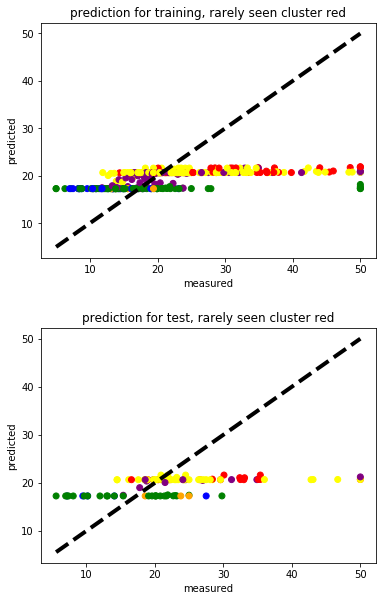

327 15
327 15
327 15
342
Epoch 1/500
342/342 [==============================] - 2s 4ms/sample - loss: 624.0324
Epoch 2/500
342/342 [==============================] - 0s 113us/sample - loss: 619.4317
Epoch 3/500
342/342 [==============================] - 0s 156us/sample - loss: 611.8649
Epoch 4/500
342/342 [==============================] - 0s 174us/sample - loss: 595.1321
Epoch 5/500
342/342 [==============================] - 0s 188us/sample - loss: 560.8306
Epoch 6/500
342/342 [==============================] - 0s 142us/sample - loss: 488.2336
Epoch 7/500
342/342 [==============================] - 0s 129us/sample - loss: 384.8205
Epoch 8/500
342/342 [==============================] - 0s 119us/sample - loss: 259.4261
Epoch 9/500
342/342 [==============================] - 0s 92us/sample - loss: 192.9192
Epoch 10/500
342/342 [==============================] - 0s 109us/sample - loss: 234.7493
Epoch 11/500
342/342 [==============================] - 0s 117us/sample - loss: 204.1657
Epoch 12

Epoch 93/500
342/342 [==============================] - 0s 102us/sample - loss: 149.2252
Epoch 94/500
342/342 [==============================] - 0s 86us/sample - loss: 164.1596
Epoch 95/500
342/342 [==============================] - 0s 98us/sample - loss: 143.1965
Epoch 96/500
342/342 [==============================] - 0s 98us/sample - loss: 129.5871
Epoch 97/500
342/342 [==============================] - 0s 105us/sample - loss: 148.7825
Epoch 98/500
342/342 [==============================] - 0s 160us/sample - loss: 133.7810
Epoch 99/500
342/342 [==============================] - 0s 124us/sample - loss: 138.7009
Epoch 100/500
342/342 [==============================] - 0s 245us/sample - loss: 118.6979
Epoch 101/500
342/342 [==============================] - 0s 109us/sample - loss: 115.4252
Epoch 102/500
342/342 [==============================] - 0s 138us/sample - loss: 147.0000
Epoch 103/500
342/342 [==============================] - 0s 101us/sample - loss: 139.3368
Epoch 104/500
342/34

Epoch 276/500
342/342 [==============================] - 0s 92us/sample - loss: 85.2062
Epoch 277/500
342/342 [==============================] - 0s 118us/sample - loss: 95.7210
Epoch 278/500
342/342 [==============================] - 0s 114us/sample - loss: 111.9410
Epoch 279/500
342/342 [==============================] - 0s 102us/sample - loss: 110.4134
Epoch 280/500
342/342 [==============================] - 0s 97us/sample - loss: 115.2120
Epoch 281/500
342/342 [==============================] - 0s 119us/sample - loss: 98.1635
Epoch 282/500
342/342 [==============================] - 0s 63us/sample - loss: 100.0066
Epoch 283/500
342/342 [==============================] - 0s 98us/sample - loss: 113.2500
Epoch 284/500
342/342 [==============================] - 0s 142us/sample - loss: 94.8521
Epoch 285/500
342/342 [==============================] - 0s 155us/sample - loss: 103.6572
Epoch 286/500
342/342 [==============================] - 0s 125us/sample - loss: 95.8514
Epoch 287/500
342/3

342/342 [==============================] - 0s 99us/sample - loss: 96.4919
Epoch 369/500
342/342 [==============================] - 0s 104us/sample - loss: 96.8026
Epoch 370/500
342/342 [==============================] - 0s 95us/sample - loss: 96.6978
Epoch 371/500
342/342 [==============================] - 0s 73us/sample - loss: 90.0289
Epoch 372/500
342/342 [==============================] - 0s 97us/sample - loss: 94.9416
Epoch 373/500
342/342 [==============================] - 0s 115us/sample - loss: 85.7432
Epoch 374/500
342/342 [==============================] - 0s 100us/sample - loss: 83.9492
Epoch 375/500
342/342 [==============================] - 0s 152us/sample - loss: 90.8754
Epoch 376/500
342/342 [==============================] - 0s 195us/sample - loss: 90.5291
Epoch 377/500
342/342 [==============================] - 0s 119us/sample - loss: 86.1860
Epoch 378/500
342/342 [==============================] - 0s 102us/sample - loss: 83.9614
Epoch 379/500
342/342 [================

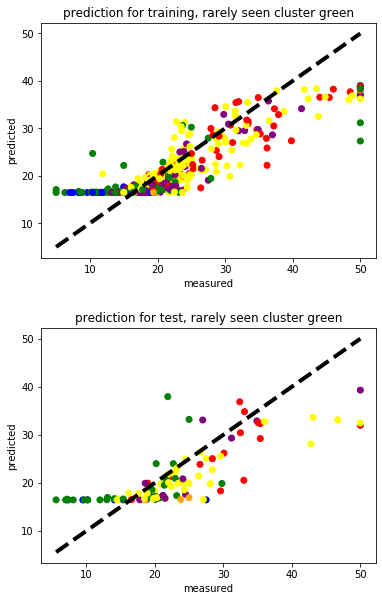

375 6
375 6
375 6
381
Epoch 1/500
381/381 [==============================] - 2s 4ms/sample - loss: 608.0707
Epoch 2/500
381/381 [==============================] - 0s 101us/sample - loss: 603.3289
Epoch 3/500
381/381 [==============================] - ETA: 0s - loss: 596.495 - 0s 178us/sample - loss: 591.0971
Epoch 4/500
381/381 [==============================] - 0s 157us/sample - loss: 564.0882
Epoch 5/500
381/381 [==============================] - 0s 201us/sample - loss: 523.0774
Epoch 6/500
381/381 [==============================] - 0s 133us/sample - loss: 432.9397
Epoch 7/500
381/381 [==============================] - 0s 126us/sample - loss: 299.9652
Epoch 8/500
381/381 [==============================] - 0s 88us/sample - loss: 222.7532
Epoch 9/500
381/381 [==============================] - 0s 94us/sample - loss: 223.0964
Epoch 10/500
381/381 [==============================] - 0s 100us/sample - loss: 223.8946
Epoch 11/500
381/381 [==============================] - 0s 100us/sample - l

Epoch 183/500
381/381 [==============================] - 0s 117us/sample - loss: 107.6713
Epoch 184/500
381/381 [==============================] - 0s 95us/sample - loss: 112.0958
Epoch 185/500
381/381 [==============================] - 0s 113us/sample - loss: 117.5901
Epoch 186/500
381/381 [==============================] - 0s 111us/sample - loss: 112.9210
Epoch 187/500
381/381 [==============================] - 0s 140us/sample - loss: 123.3842
Epoch 188/500
381/381 [==============================] - 0s 129us/sample - loss: 103.2684
Epoch 189/500
381/381 [==============================] - 0s 148us/sample - loss: 115.2202
Epoch 190/500
381/381 [==============================] - 0s 115us/sample - loss: 110.0234
Epoch 191/500
381/381 [==============================] - 0s 207us/sample - loss: 109.6593
Epoch 192/500
381/381 [==============================] - 0s 123us/sample - loss: 119.6784
Epoch 193/500
381/381 [==============================] - 0s 123us/sample - loss: 104.0927
Epoch 194/5

381/381 [==============================] - 0s 65us/sample - loss: 95.7731
Epoch 367/500
381/381 [==============================] - 0s 86us/sample - loss: 85.5034
Epoch 368/500
381/381 [==============================] - 0s 85us/sample - loss: 77.8190
Epoch 369/500
381/381 [==============================] - 0s 123us/sample - loss: 91.4162
Epoch 370/500
381/381 [==============================] - 0s 123us/sample - loss: 93.7876
Epoch 371/500
381/381 [==============================] - 0s 194us/sample - loss: 80.4264
Epoch 372/500
381/381 [==============================] - 0s 121us/sample - loss: 71.3208
Epoch 373/500
381/381 [==============================] - 0s 154us/sample - loss: 96.0459
Epoch 374/500
381/381 [==============================] - 0s 133us/sample - loss: 81.0042
Epoch 375/500
381/381 [==============================] - 0s 164us/sample - loss: 82.0349
Epoch 376/500
381/381 [==============================] - 0s 103us/sample - loss: 85.1655
Epoch 377/500
381/381 [===============

381/381 [==============================] - 0s 90us/sample - loss: 76.4678
Epoch 459/500
381/381 [==============================] - 0s 96us/sample - loss: 72.6736
Epoch 460/500
381/381 [==============================] - 0s 134us/sample - loss: 68.6639
Epoch 461/500
381/381 [==============================] - 0s 150us/sample - loss: 77.4351
Epoch 462/500
381/381 [==============================] - 0s 159us/sample - loss: 77.0835
Epoch 463/500
381/381 [==============================] - 0s 164us/sample - loss: 70.9796
Epoch 464/500
381/381 [==============================] - 0s 205us/sample - loss: 72.2601
Epoch 465/500
381/381 [==============================] - 0s 117us/sample - loss: 73.3681
Epoch 466/500
381/381 [==============================] - 0s 113us/sample - loss: 72.5561
Epoch 467/500
381/381 [==============================] - 0s 176us/sample - loss: 76.3375
Epoch 468/500
381/381 [==============================] - 0s 140us/sample - loss: 84.9031
Epoch 469/500
381/381 [==============

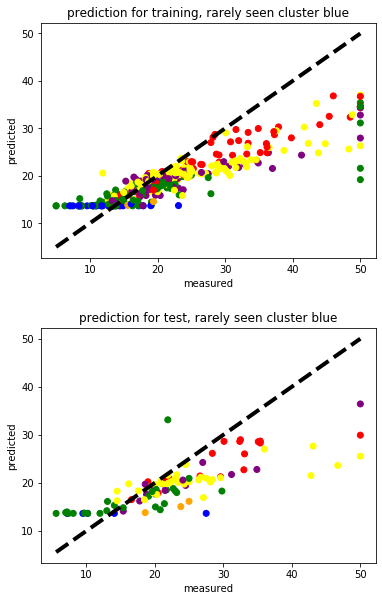

331 15
331 15
331 15
346
Epoch 1/500
346/346 [==============================] - 2s 5ms/sample - loss: 587.7885
Epoch 2/500
346/346 [==============================] - 0s 151us/sample - loss: 581.7934
Epoch 3/500
346/346 [==============================] - 0s 82us/sample - loss: 562.6955
Epoch 4/500
346/346 [==============================] - 0s 117us/sample - loss: 519.8178
Epoch 5/500
346/346 [==============================] - 0s 129us/sample - loss: 455.9519
Epoch 6/500
346/346 [==============================] - 0s 104us/sample - loss: 354.9502
Epoch 7/500
346/346 [==============================] - 0s 197us/sample - loss: 260.8293
Epoch 8/500
346/346 [==============================] - 0s 124us/sample - loss: 202.7024
Epoch 9/500
346/346 [==============================] - 0s 189us/sample - loss: 204.5341
Epoch 10/500
346/346 [==============================] - 0s 112us/sample - loss: 227.2449
Epoch 11/500
346/346 [==============================] - 0s 206us/sample - loss: 205.9878
Epoch 12

346/346 [==============================] - 0s 103us/sample - loss: 139.4625
Epoch 94/500
346/346 [==============================] - 0s 92us/sample - loss: 127.9181
Epoch 95/500
346/346 [==============================] - 0s 85us/sample - loss: 130.8182
Epoch 96/500
346/346 [==============================] - 0s 159us/sample - loss: 142.1446
Epoch 97/500
346/346 [==============================] - 0s 113us/sample - loss: 140.4804
Epoch 98/500
346/346 [==============================] - 0s 102us/sample - loss: 154.6899
Epoch 99/500
346/346 [==============================] - 0s 149us/sample - loss: 136.1144
Epoch 100/500
346/346 [==============================] - 0s 156us/sample - loss: 147.0302
Epoch 101/500
346/346 [==============================] - 0s 134us/sample - loss: 152.8600
Epoch 102/500
346/346 [==============================] - 0s 104us/sample - loss: 130.9089
Epoch 103/500
346/346 [==============================] - 0s 146us/sample - loss: 151.7039
Epoch 104/500
346/346 [=========

346/346 [==============================] - 0s 117us/sample - loss: 103.3030
Epoch 276/500
346/346 [==============================] - 0s 142us/sample - loss: 112.1528
Epoch 277/500
346/346 [==============================] - 0s 181us/sample - loss: 92.5163
Epoch 278/500
346/346 [==============================] - 0s 202us/sample - loss: 96.3780
Epoch 279/500
346/346 [==============================] - 0s 131us/sample - loss: 106.7334
Epoch 280/500
346/346 [==============================] - 0s 124us/sample - loss: 94.0195
Epoch 281/500
346/346 [==============================] - 0s 145us/sample - loss: 107.3974
Epoch 282/500
346/346 [==============================] - 0s 192us/sample - loss: 120.3343
Epoch 283/500
346/346 [==============================] - 0s 150us/sample - loss: 99.0483
Epoch 284/500
346/346 [==============================] - 0s 132us/sample - loss: 118.5795
Epoch 285/500
346/346 [==============================] - 0s 136us/sample - loss: 108.0542
Epoch 286/500
346/346 [=====

Epoch 367/500
346/346 [==============================] - 0s 103us/sample - loss: 79.6515
Epoch 368/500
346/346 [==============================] - 0s 87us/sample - loss: 99.7046
Epoch 369/500
346/346 [==============================] - 0s 98us/sample - loss: 88.4674
Epoch 370/500
346/346 [==============================] - 0s 181us/sample - loss: 91.0599
Epoch 371/500
346/346 [==============================] - 0s 133us/sample - loss: 98.5784
Epoch 372/500
346/346 [==============================] - 0s 216us/sample - loss: 74.6702
Epoch 373/500
346/346 [==============================] - 0s 142us/sample - loss: 112.4651
Epoch 374/500
346/346 [==============================] - 0s 106us/sample - loss: 96.4645
Epoch 375/500
346/346 [==============================] - 0s 152us/sample - loss: 85.3939
Epoch 376/500
346/346 [==============================] - 0s 121us/sample - loss: 87.3866
Epoch 377/500
346/346 [==============================] - 0s 191us/sample - loss: 98.3365
Epoch 378/500
346/346 

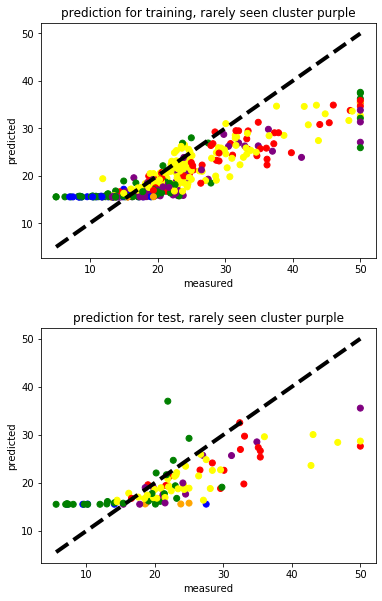

250 31
250 31
250 31
281
Epoch 1/500
281/281 [==============================] - 2s 6ms/sample - loss: 547.8971
Epoch 2/500
281/281 [==============================] - 0s 123us/sample - loss: 542.9763
Epoch 3/500
281/281 [==============================] - 0s 123us/sample - loss: 535.7329
Epoch 4/500
281/281 [==============================] - 0s 119us/sample - loss: 518.4164
Epoch 5/500
281/281 [==============================] - 0s 101us/sample - loss: 498.1736
Epoch 6/500
281/281 [==============================] - 0s 202us/sample - loss: 456.1557
Epoch 7/500
281/281 [==============================] - 0s 130us/sample - loss: 399.0528
Epoch 8/500
281/281 [==============================] - 0s 188us/sample - loss: 331.9451
Epoch 9/500
281/281 [==============================] - 0s 167us/sample - loss: 245.9213
Epoch 10/500
281/281 [==============================] - 0s 133us/sample - loss: 212.1661
Epoch 11/500
281/281 [==============================] - 0s 165us/sample - loss: 214.3304
Epoch 1

281/281 [==============================] - 0s 105us/sample - loss: 143.8408
Epoch 94/500
281/281 [==============================] - 0s 100us/sample - loss: 162.1431
Epoch 95/500
281/281 [==============================] - 0s 66us/sample - loss: 143.9201
Epoch 96/500
281/281 [==============================] - 0s 114us/sample - loss: 147.2462
Epoch 97/500
281/281 [==============================] - 0s 111us/sample - loss: 132.9677
Epoch 98/500
281/281 [==============================] - 0s 177us/sample - loss: 125.4948
Epoch 99/500
281/281 [==============================] - 0s 224us/sample - loss: 134.9822
Epoch 100/500
281/281 [==============================] - 0s 61us/sample - loss: 147.2229
Epoch 101/500
281/281 [==============================] - 0s 117us/sample - loss: 154.7922
Epoch 102/500
281/281 [==============================] - 0s 153us/sample - loss: 136.8255
Epoch 103/500
281/281 [==============================] - 0s 155us/sample - loss: 138.5921
Epoch 104/500
281/281 [=========

281/281 [==============================] - 0s 59us/sample - loss: 100.1534
Epoch 276/500
281/281 [==============================] - 0s 118us/sample - loss: 89.5142
Epoch 277/500
281/281 [==============================] - 0s 153us/sample - loss: 100.1240
Epoch 278/500
281/281 [==============================] - 0s 71us/sample - loss: 87.7416
Epoch 279/500
281/281 [==============================] - 0s 163us/sample - loss: 87.4974
Epoch 280/500
281/281 [==============================] - 0s 107us/sample - loss: 99.2303
Epoch 281/500
281/281 [==============================] - 0s 180us/sample - loss: 105.5471
Epoch 282/500
281/281 [==============================] - 0s 259us/sample - loss: 104.0982
Epoch 283/500
281/281 [==============================] - 0s 106us/sample - loss: 115.5778
Epoch 284/500
281/281 [==============================] - 0s 148us/sample - loss: 108.8305
Epoch 285/500
281/281 [==============================] - 0s 102us/sample - loss: 99.7116
Epoch 286/500
281/281 [========

281/281 [==============================] - 0s 68us/sample - loss: 90.1185
Epoch 368/500
281/281 [==============================] - 0s 65us/sample - loss: 97.6055
Epoch 369/500
281/281 [==============================] - 0s 111us/sample - loss: 108.1877
Epoch 370/500
281/281 [==============================] - 0s 127us/sample - loss: 101.0252
Epoch 371/500
281/281 [==============================] - 0s 120us/sample - loss: 106.4549
Epoch 372/500
281/281 [==============================] - 0s 151us/sample - loss: 85.7660
Epoch 373/500
281/281 [==============================] - 0s 130us/sample - loss: 124.4382
Epoch 374/500
281/281 [==============================] - 0s 227us/sample - loss: 109.0816
Epoch 375/500
281/281 [==============================] - 0s 150us/sample - loss: 93.4107
Epoch 376/500
281/281 [==============================] - 0s 191us/sample - loss: 100.2124
Epoch 377/500
281/281 [==============================] - 0s 105us/sample - loss: 99.1392
Epoch 378/500
281/281 [========

Epoch 459/500
281/281 [==============================] - 0s 100us/sample - loss: 104.1528
Epoch 460/500
281/281 [==============================] - 0s 165us/sample - loss: 89.2967
Epoch 461/500
281/281 [==============================] - 0s 112us/sample - loss: 80.6234
Epoch 462/500
281/281 [==============================] - 0s 179us/sample - loss: 101.0786
Epoch 463/500
281/281 [==============================] - 0s 123us/sample - loss: 91.4526
Epoch 464/500
281/281 [==============================] - 0s 203us/sample - loss: 100.9015
Epoch 465/500
281/281 [==============================] - 0s 97us/sample - loss: 85.3693
Epoch 466/500
281/281 [==============================] - 0s 150us/sample - loss: 86.0100
Epoch 467/500
281/281 [==============================] - 0s 111us/sample - loss: 79.2812
Epoch 468/500
281/281 [==============================] - 0s 125us/sample - loss: 79.8683
Epoch 469/500
281/281 [==============================] - 0s 184us/sample - loss: 90.5676
Epoch 470/500
281/2

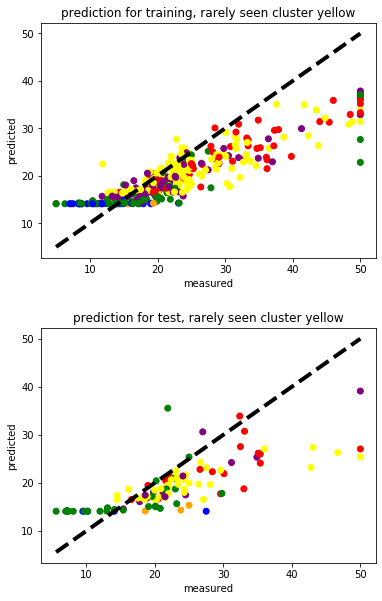

396 2
396 2
396 2
398
Epoch 1/500
398/398 [==============================] - 2s 5ms/sample - loss: 591.5037
Epoch 2/500
398/398 [==============================] - 0s 134us/sample - loss: 584.8958
Epoch 3/500
398/398 [==============================] - 0s 100us/sample - loss: 569.5923
Epoch 4/500
398/398 [==============================] - 0s 129us/sample - loss: 538.1992
Epoch 5/500
398/398 [==============================] - 0s 124us/sample - loss: 470.2956
Epoch 6/500
398/398 [==============================] - 0s 157us/sample - loss: 343.1084
Epoch 7/500
398/398 [==============================] - 0s 190us/sample - loss: 229.2207
Epoch 8/500
398/398 [==============================] - 0s 134us/sample - loss: 213.8735
Epoch 9/500
398/398 [==============================] - 0s 139us/sample - loss: 194.1560
Epoch 10/500
398/398 [==============================] - 0s 190us/sample - loss: 204.2216
Epoch 11/500
398/398 [==============================] - 0s 210us/sample - loss: 182.3782
Epoch 12/5

398/398 [==============================] - 0s 123us/sample - loss: 102.2598
Epoch 184/500
398/398 [==============================] - 0s 128us/sample - loss: 122.0837
Epoch 185/500
398/398 [==============================] - 0s 160us/sample - loss: 122.0497
Epoch 186/500
398/398 [==============================] - 0s 167us/sample - loss: 108.7399
Epoch 187/500
398/398 [==============================] - 0s 156us/sample - loss: 107.8270
Epoch 188/500
398/398 [==============================] - 0s 144us/sample - loss: 111.4474
Epoch 189/500
398/398 [==============================] - 0s 144us/sample - loss: 121.0016
Epoch 190/500
398/398 [==============================] - 0s 154us/sample - loss: 116.1706
Epoch 191/500
398/398 [==============================] - 0s 169us/sample - loss: 109.1651
Epoch 192/500
398/398 [==============================] - 0s 226us/sample - loss: 100.2505
Epoch 193/500
398/398 [==============================] - 0s 148us/sample - loss: 107.7996
Epoch 194/500
398/398 [=

398/398 [==============================] - 0s 101us/sample - loss: 85.9151
Epoch 365/500
398/398 [==============================] - 0s 158us/sample - loss: 83.7769
Epoch 366/500
398/398 [==============================] - 0s 141us/sample - loss: 93.6001
Epoch 367/500
398/398 [==============================] - 0s 240us/sample - loss: 85.9340
Epoch 368/500
398/398 [==============================] - 0s 180us/sample - loss: 83.1577
Epoch 369/500
398/398 [==============================] - 0s 132us/sample - loss: 94.1442
Epoch 370/500
398/398 [==============================] - 0s 124us/sample - loss: 87.2478
Epoch 371/500
398/398 [==============================] - 0s 158us/sample - loss: 88.8605
Epoch 372/500
398/398 [==============================] - 0s 175us/sample - loss: 87.9896
Epoch 373/500
398/398 [==============================] - 0s 198us/sample - loss: 100.3616
Epoch 374/500
398/398 [==============================] - 0s 152us/sample - loss: 98.5070
Epoch 375/500
398/398 [===========

398/398 [==============================] - 0s 133us/sample - loss: 80.3915
Epoch 457/500
398/398 [==============================] - 0s 90us/sample - loss: 81.4641
Epoch 458/500
398/398 [==============================] - 0s 143us/sample - loss: 79.5164
Epoch 459/500
398/398 [==============================] - 0s 185us/sample - loss: 78.1309
Epoch 460/500
398/398 [==============================] - 0s 153us/sample - loss: 79.2130
Epoch 461/500
398/398 [==============================] - 0s 175us/sample - loss: 81.4528
Epoch 462/500
398/398 [==============================] - 0s 185us/sample - loss: 76.5835
Epoch 463/500
398/398 [==============================] - 0s 160us/sample - loss: 80.8091
Epoch 464/500
398/398 [==============================] - 0s 149us/sample - loss: 82.9965
Epoch 465/500
398/398 [==============================] - 0s 155us/sample - loss: 90.0689
Epoch 466/500
398/398 [==============================] - 0s 187us/sample - loss: 72.7648
Epoch 467/500
398/398 [=============

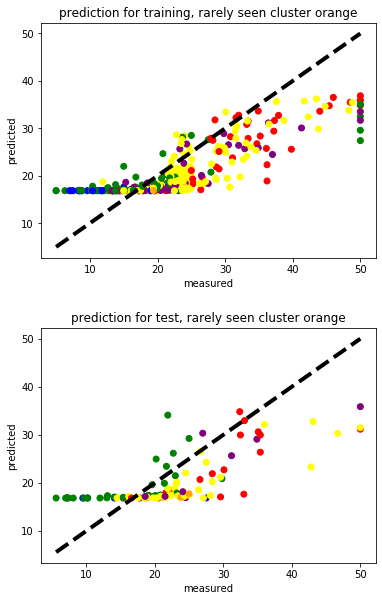

In [51]:
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'orange']

for i in range(0,6,1):
    keep_x = train_x[np.where(cluster_train==i)[0]]
    keep_y = train_y[np.where(cluster_train==i)[0]]
    cluster_train_keep = cluster_train[np.where(cluster_train == i)[0]]
    n = len(keep_x)
    k = round(n*0.2)
                                                
    train_x_mod = np.delete(train_x, np.where((cluster_train == i))[0], axis = 0)
    train_y_mod = np.delete(train_y, np.where((cluster_train == i))[0], axis = 0)
    cluster_train_mod = np.delete(cluster_train, np.where((cluster_train == i))[0], axis = 0)
    
    print(len(train_x_mod), len(keep_x[0:k]))
    train_x_mod = np.concatenate([train_x_mod, keep_x[0:k]], axis = 0)
    print(len(train_y_mod), len(keep_y[0:k]))
    print(len(cluster_train_mod), len(cluster_train_keep[0:k]))
    train_y_mod = np.concatenate([train_y_mod, keep_y[0:k]], axis = 0)
    print(len(train_y_mod))
    cluster_train_mod = np.concatenate([cluster_train_mod, cluster_train_keep[0:k]], axis = 0)
    
    model_mc = keras.Sequential([
    keras.layers.Dense(13, input_dim=13, kernel_initializer='normal', activation='sigmoid'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(26),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(13),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(9),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(6),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(3),
    keras.layers.Dropout(0.2),
    #keras.layers.Dropout(0.5),
    keras.layers.Dense(1, kernel_initializer='normal')
    ])

    model_mc.compile(loss='mean_squared_error', optimizer='adam')
    
    history = model_mc.fit(train_x_mod, train_y_mod, epochs = 500)
    
    # with the unseen points during training
    pred_test = model_mc.predict(train_x)
    pred = model_mc.predict(test_x)
    sme = ((test_y-pred)**2).mean()
    print("sme on test set: ", sme)

    plt.subplots_adjust(hspace = 0.3, top = 2)
    plt.subplot(2, 1, 1)
    t = 'prediction for training, rarely seen cluster ' + colors[i]
    #fig, ax = plt.subplots()
    plt.scatter(train_y, pred_test, c = cluster_train, cmap=matplotlib.colors.ListedColormap(colors))
    plt.plot([train_y.min(), train_y.max()], [train_y.min(), train_y.max()], 'k--', lw=4)
    plt.xlabel('measured')
    plt.ylabel('predicted')
    plt.title(t)
    
    # check the test dataset
    plt.subplot(2, 1, 2)
    t = 'prediction for test, rarely seen cluster ' + colors[i]
    #fig, ax = plt.subplots()
    plt.scatter(test_y, pred, c = cluster_test, cmap=matplotlib.colors.ListedColormap(colors))
    plt.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=4)
    plt.xlabel('measured')
    plt.ylabel('predicted')
    plt.title(t)
    
    
    plt.show()        

# make exclusion based on the target variable

## exclude high values = expensive houses

(array([ 15.,  48.,  72., 120.,  64.,  31.,  21.,   8.,   8.,  17.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <a list of 10 Patch objects>)

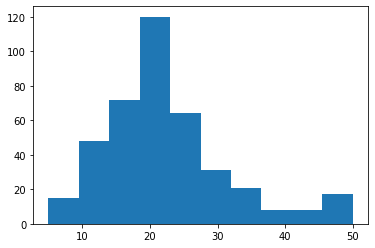

In [101]:
plt.hist(train_y)

In [3]:
threshhold = np.percentile(train_y, 90)

In [4]:
keep_x = train_x[np.where((train_y > threshhold))[0]]
keep_y = train_y[np.where((train_y > threshhold))[0]]
n = round(len(keep_x)*0,2)

In [5]:
train_x_mod = np.delete(train_x, np.where((train_y > threshhold))[0], axis = 0)
train_y_mod = np.delete(train_y, np.where((train_y > threshhold))[0], axis = 0)

In [6]:
train_x_mod = np.concatenate([train_x_mod, keep_x[0:n]], axis = 0)
train_y_mod = np.concatenate([train_y_mod, keep_y[0:n]], axis = 0)

In [7]:
train_mod_class = train_y > threshhold
#print(train_mod_class)

In [110]:
# create a baseline NN
model_nn2 = keras.Sequential([
    keras.layers.Dense(13, input_dim=13, kernel_initializer='normal', activation='sigmoid'),
    keras.layers.Dense(26),
    keras.layers.Dense(13),
    keras.layers.Dense(9),
    keras.layers.Dense(6),
    keras.layers.Dense(3),
    #keras.layers.Dropout(0.5),
    keras.layers.Dense(1, kernel_initializer='normal')
])

model_nn2.compile(loss='mean_squared_error', optimizer='adam')

history = model_nn2.fit(train_x_mod, train_y_mod, epochs = 500)

Epoch 1/500
363/363 [==============================] - 3s 8ms/sample - loss: 433.4331
Epoch 2/500
363/363 [==============================] - 0s 159us/sample - loss: 422.3248
Epoch 3/500
363/363 [==============================] - 0s 112us/sample - loss: 397.4002
Epoch 4/500
363/363 [==============================] - 0s 137us/sample - loss: 343.9390
Epoch 5/500
363/363 [==============================] - 0s 134us/sample - loss: 246.6313
Epoch 6/500
363/363 [==============================] - 0s 115us/sample - loss: 105.7051
Epoch 7/500
363/363 [==============================] - 0s 125us/sample - loss: 37.2032
Epoch 8/500
363/363 [==============================] - 0s 112us/sample - loss: 38.3473
Epoch 9/500
363/363 [==============================] - 0s 106us/sample - loss: 33.4944
Epoch 10/500
363/363 [==============================] - 0s 103us/sample - loss: 30.7175
Epoch 11/500
363/363 [==============================] - 0s 110us/sample - loss: 25.9505
Epoch 12/500
363/363 [===============

363/363 [==============================] - 0s 86us/sample - loss: 8.5457
Epoch 188/500
363/363 [==============================] - 0s 86us/sample - loss: 7.4784
Epoch 189/500
363/363 [==============================] - 0s 86us/sample - loss: 7.3091
Epoch 190/500
363/363 [==============================] - 0s 79us/sample - loss: 7.6719
Epoch 191/500
363/363 [==============================] - 0s 81us/sample - loss: 7.4903
Epoch 192/500
363/363 [==============================] - 0s 100us/sample - loss: 8.2139
Epoch 193/500
363/363 [==============================] - 0s 75us/sample - loss: 7.7170
Epoch 194/500
363/363 [==============================] - 0s 81us/sample - loss: 8.0243
Epoch 195/500
363/363 [==============================] - 0s 126us/sample - loss: 7.5568
Epoch 196/500
363/363 [==============================] - 0s 136us/sample - loss: 7.5810
Epoch 197/500
363/363 [==============================] - 0s 153us/sample - loss: 8.9036
Epoch 198/500
363/363 [==============================

Epoch 281/500
363/363 [==============================] - 0s 113us/sample - loss: 8.4752
Epoch 282/500
363/363 [==============================] - 0s 90us/sample - loss: 7.2692
Epoch 283/500
363/363 [==============================] - 0s 50us/sample - loss: 7.1364
Epoch 284/500
363/363 [==============================] - 0s 88us/sample - loss: 7.0187
Epoch 285/500
363/363 [==============================] - 0s 95us/sample - loss: 6.9838
Epoch 286/500
363/363 [==============================] - 0s 89us/sample - loss: 6.9147
Epoch 287/500
363/363 [==============================] - 0s 92us/sample - loss: 7.0717
Epoch 288/500
363/363 [==============================] - 0s 102us/sample - loss: 7.4044
Epoch 289/500
363/363 [==============================] - 0s 72us/sample - loss: 7.0371
Epoch 290/500
363/363 [==============================] - 0s 77us/sample - loss: 7.1644
Epoch 291/500
363/363 [==============================] - 0s 82us/sample - loss: 7.2610
Epoch 292/500
363/363 [==================

363/363 [==============================] - 0s 99us/sample - loss: 6.8703
Epoch 469/500
363/363 [==============================] - 0s 117us/sample - loss: 6.6402
Epoch 470/500
363/363 [==============================] - 0s 48us/sample - loss: 6.5662
Epoch 471/500
363/363 [==============================] - 0s 93us/sample - loss: 6.7016
Epoch 472/500
363/363 [==============================] - 0s 86us/sample - loss: 6.7694
Epoch 473/500
363/363 [==============================] - 0s 53us/sample - loss: 6.9506
Epoch 474/500
363/363 [==============================] - 0s 118us/sample - loss: 7.3588
Epoch 475/500
363/363 [==============================] - 0s 258us/sample - loss: 7.0556s - loss: 7.291
Epoch 476/500
363/363 [==============================] - 0s 121us/sample - loss: 7.9018
Epoch 477/500
363/363 [==============================] - 0s 85us/sample - loss: 7.1534
Epoch 478/500
363/363 [==============================] - 0s 132us/sample - loss: 7.0295
Epoch 479/500
363/363 [==============

In [112]:
model_nn2.save('B_101_baseline2.h5')

In [8]:
model_nn2 = tf.keras.models.load_model('B_101_baseline2.h5')

W0105 21:37:33.898961 11900 deprecation.py:506] From c:\users\annar\project_folder\venv\lib\site-packages\tensorflow\python\keras\initializers.py:143: calling RandomNormal.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0105 21:37:33.903396 11900 deprecation.py:506] From c:\users\annar\project_folder\venv\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0105 21:37:33.922235 11900 deprecation.py:506] From c:\users\annar\project_folder\venv\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_

In [114]:
model_mc2 = keras.Sequential([
    keras.layers.Dense(13, input_dim=13, kernel_initializer='normal', activation='sigmoid'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(26),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(13),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(9),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(6),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(3),
    keras.layers.Dropout(0.2),
    #keras.layers.Dropout(0.5),
    keras.layers.Dense(1, kernel_initializer='normal')
])

model_mc2.compile(loss='mean_squared_error', optimizer='adam')

In [115]:
history = model_mc2.fit(train_x_mod, train_y_mod, epochs = 500)

Epoch 1/500
363/363 [==============================] - 3s 9ms/sample - loss: 433.8399
Epoch 2/500
363/363 [==============================] - 0s 166us/sample - loss: 422.9223
Epoch 3/500
363/363 [==============================] - 0s 133us/sample - loss: 401.9002
Epoch 4/500
363/363 [==============================] - 0s 74us/sample - loss: 364.0334
Epoch 5/500
363/363 [==============================] - 0s 111us/sample - loss: 294.7713
Epoch 6/500
363/363 [==============================] - 0s 123us/sample - loss: 192.6324
Epoch 7/500
363/363 [==============================] - 0s 111us/sample - loss: 145.4435
Epoch 8/500
363/363 [==============================] - 0s 107us/sample - loss: 137.9115
Epoch 9/500
363/363 [==============================] - 0s 109us/sample - loss: 135.3193
Epoch 10/500
363/363 [==============================] - 0s 107us/sample - loss: 136.2007
Epoch 11/500
363/363 [==============================] - 0s 124us/sample - loss: 142.0474
Epoch 12/500
363/363 [===========

Epoch 94/500
363/363 [==============================] - 0s 120us/sample - loss: 80.0615
Epoch 95/500
363/363 [==============================] - 0s 121us/sample - loss: 89.8347
Epoch 96/500
363/363 [==============================] - 0s 102us/sample - loss: 75.1536
Epoch 97/500
363/363 [==============================] - 0s 102us/sample - loss: 73.6272
Epoch 98/500
363/363 [==============================] - 0s 107us/sample - loss: 83.5537
Epoch 99/500
363/363 [==============================] - 0s 96us/sample - loss: 80.1270
Epoch 100/500
363/363 [==============================] - 0s 95us/sample - loss: 89.2923
Epoch 101/500
363/363 [==============================] - 0s 117us/sample - loss: 82.3241
Epoch 102/500
363/363 [==============================] - 0s 92us/sample - loss: 80.6600
Epoch 103/500
363/363 [==============================] - 0s 105us/sample - loss: 96.0126
Epoch 104/500
363/363 [==============================] - 0s 113us/sample - loss: 79.2872
Epoch 105/500
363/363 [=======

363/363 [==============================] - 0s 114us/sample - loss: 64.8156
Epoch 279/500
363/363 [==============================] - 0s 112us/sample - loss: 60.0127
Epoch 280/500
363/363 [==============================] - 0s 128us/sample - loss: 67.7448
Epoch 281/500
363/363 [==============================] - 0s 143us/sample - loss: 55.0172
Epoch 282/500
363/363 [==============================] - 0s 106us/sample - loss: 61.3976
Epoch 283/500
363/363 [==============================] - 0s 161us/sample - loss: 59.4601
Epoch 284/500
363/363 [==============================] - 0s 152us/sample - loss: 63.7216
Epoch 285/500
363/363 [==============================] - 0s 106us/sample - loss: 54.9168
Epoch 286/500
363/363 [==============================] - 0s 92us/sample - loss: 61.4599
Epoch 287/500
363/363 [==============================] - 0s 116us/sample - loss: 57.0454
Epoch 288/500
363/363 [==============================] - 0s 71us/sample - loss: 53.0434
Epoch 289/500
363/363 [==============

363/363 [==============================] - 0s 106us/sample - loss: 53.6605
Epoch 463/500
363/363 [==============================] - 0s 113us/sample - loss: 42.3076
Epoch 464/500
363/363 [==============================] - 0s 118us/sample - loss: 46.5483
Epoch 465/500
363/363 [==============================] - 0s 227us/sample - loss: 47.0616
Epoch 466/500
363/363 [==============================] - 0s 143us/sample - loss: 46.5200
Epoch 467/500
363/363 [==============================] - 0s 141us/sample - loss: 45.0653
Epoch 468/500
363/363 [==============================] - 0s 128us/sample - loss: 52.6440
Epoch 469/500
363/363 [==============================] - 0s 182us/sample - loss: 38.7197
Epoch 470/500
363/363 [==============================] - 0s 178us/sample - loss: 38.8913
Epoch 471/500
363/363 [==============================] - 0s 248us/sample - loss: 45.0356
Epoch 472/500
363/363 [==============================] - 0s 244us/sample - loss: 44.7459
Epoch 473/500
363/363 [============

In [116]:
model_mc2.save('B_101_mc2.h5')

In [9]:
model_mc2 = tf.keras.models.load_model('B_101_mc2.h5')

In [14]:
# check the training and the unseen data points
pred_base = model_nn2.predict(train_x)
pred_mc2 = model_mc2.predict(train_x)

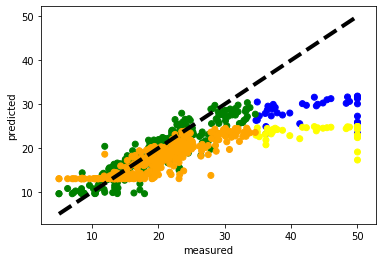

In [32]:
colors_base = ['green', 'blue']
colors_mc2 = ['orange', 'yellow']
fig, ax = plt.subplots()
ax.scatter(train_y, pred_base, c = train_mod_class, cmap=matplotlib.colors.ListedColormap(colors_base))
ax.scatter(train_y, pred_mc2, c = train_mod_class, cmap=matplotlib.colors.ListedColormap(colors_mc2))
ax.plot([train_y.min(), train_y.max()], [train_y.min(), train_y.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')

plt.show()

In [17]:
test_mod_class = test_y > threshhold

In [18]:
# check the test and the unseen data points
pred_base = model_nn2.predict(test_x)
pred_mc2 = model_mc2.predict(test_x)

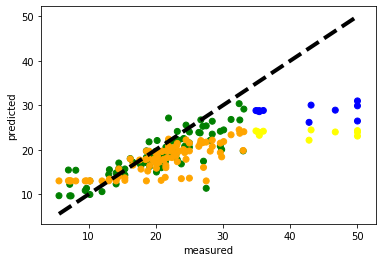

In [19]:
colors_base = ['green', 'blue']
colors_mc2 = ['orange', 'yellow']
fig, ax = plt.subplots()
ax.scatter(test_y, pred_base, c = test_mod_class, cmap=matplotlib.colors.ListedColormap(colors_base))
ax.scatter(test_y, pred_mc2, c = test_mod_class, cmap=matplotlib.colors.ListedColormap(colors_mc2))
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')

plt.show()

## test a prediction method with uncertainty

In [20]:
import tensorflow.keras.backend as K
model_mc2_pred = K.function([model_mc2.input, K.learning_phase()], [model_mc2.output])

In [21]:
# set n for number of iterations:
n = 100
x = np.array(model_mc2_pred([test_x, 1]))
for i in range(1, n, 1):
    y = np.array(model_mc2_pred([test_x, 1]))
    x = np.concatenate([x,y], axis = 0)
pred_mean = x.mean(axis = 0)
pred_var = x.var(axis = 0)

# The variance is the average of the squared deviations from the mean, i.e., var = mean(abs(x - x.mean())**2).

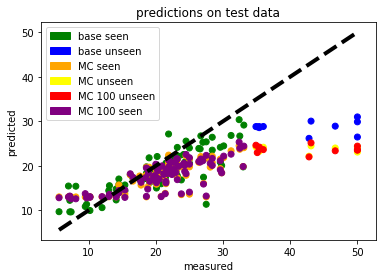

In [24]:
import matplotlib.patches as mpatches

colors_base = ['green', 'blue']
colors_mc2 = ['orange', 'yellow']
colors_mc2_pred = ['purple', 'red']
fig, ax = plt.subplots()
ax.scatter(test_y, pred_base, c = test_mod_class, cmap=matplotlib.colors.ListedColormap(colors_base))
ax.scatter(test_y, pred_mc2, c = test_mod_class, cmap=matplotlib.colors.ListedColormap(colors_mc2))
ax.scatter(test_y, pred_mean, c = test_mod_class, cmap=matplotlib.colors.ListedColormap(colors_mc2_pred))
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
ax.set_title('predictions on test data')

green_patch = mpatches.Patch(color='green', label='base seen')
blue_patch = mpatches.Patch(color='blue', label='base unseen')
orange_patch = mpatches.Patch(color='orange', label='MC seen')
yellow_patch = mpatches.Patch(color='yellow', label='MC unseen')
purple_patch = mpatches.Patch(color='purple', label='MC 100 seen')
red_patch = mpatches.Patch(color='red', label='MC 100 unseen')
#purple_patch = mpatches.Circle(color='purple', label='MC 100')
plt.legend(handles=[green_patch, blue_patch, orange_patch, yellow_patch, red_patch, purple_patch])

plt.show()

In [42]:
test_y_exp = np.expand_dims(test_y, axis = 1)
alles = np.concatenate([test_y_exp, pred_base, pred_mc2, pred_mean, pred_var], axis = 1)

In [43]:
# sort the arrays by the variance from the mc predict
alles_sorted = alles[alles[:,0].argsort()]

In [44]:
n = len(alles_sorted)
base = []
mc = []
mc2 = []
for i in range(20, n, 20):
    data = alles_sorted[0:i]
    data = pd.DataFrame(data)
    mse_b = ((data[0] - data[1])**2).mean()
    base.append(mse_b)
    mse_mc2 = ((data[0] - data[3])**2).mean()
    mc2.append(mse_mc2)
    mse_mc = ((data[0] - data[2])**2).mean()
    mc.append(mse_mc)

In [45]:
base

[10.857439884476104,
 7.8927660397573645,
 7.8050568724453635,
 12.756962743597816,
 29.173195777521233]

In [46]:
mc2

[14.38319000839804,
 11.488234118101403,
 11.966730199618219,
 21.327397830415567,
 53.22520872838729]

In [47]:
mc

[13.51239515480998,
 11.101621569141878,
 11.737066875548996,
 20.891309981687176,
 52.11326241880055]

In [48]:
mc[::-1]

[52.11326241880055,
 20.891309981687176,
 11.737066875548996,
 11.101621569141878,
 13.51239515480998]

Text(0.5, 1.0, 'MSE for test data')

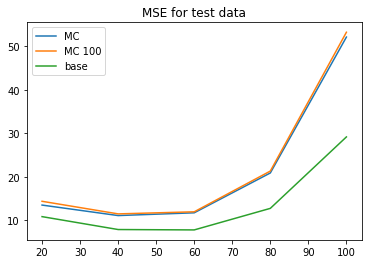

In [49]:
x = [20, 40, 60, 80, 100]
plt.plot(x, mc, label = 'MC')
plt.plot(x, mc2, label = 'MC 100')
plt.plot(x, base, label = 'base')
plt.legend(loc='upper left')
plt.title('MSE for test data')